In [1]:
### Hide numerous warnings due to replacaments in data frames
import warnings
warnings.filterwarnings('ignore')

# Sample notebook to process the TotalControl LES Benchmark Results 
## TotaControl LES
Validation Data for the upstream turbines can be downloaded from [data.dtu.dk](https://doi.org/10.11583/DTU.13414922). Contact [Søren Juhl Andersen](mailto:sjan@dtu.dk) for full access to the validation dataset.

### *Validation* and *Participants*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SINGLE WAKE 
## Validation Dataset
Original EllipSys3D LES runs

In [3]:
basePath = '/media/tuhfe/TuhfDisk/WindDataFiles/Soren_LES_Simulations/FarmConners/Data/'

### --------- rot90 ----------- ###

rot = 'cnblz02e3m_rot90_yaw/' # --- Steering

validation_steering_turb_29 = pd.read_csv(basePath+rot+'TCal_wt29.dat',
                                          delimiter=' ')
validation_steering_turb_29 = validation_steering_turb_29.iloc[:,:-1]

turbines = [x for x in range(25, 33)]

for i in turbines:
    locals()['validation_steering_turb_'+str(i)] = pd.read_csv(basePath+rot+'TCal_wt'+str(i)+'.dat',
                                                              delimiter=' ',
                                                              skiprows=1,
                                                              names=validation_steering_turb_29.columns)
    locals()['validation_steering_turb_'+str(i)] = locals()['validation_steering_turb_'+str(i)].iloc[899:,:]
    locals()['validation_steering_turb_'+str(i)].index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='s').time
    
rot = 'cnblz02e3m_rot90/' # --- Normal operation

validation_normal_turb_29 = pd.read_csv(basePath+rot+'TCal_wt29.dat',
                                        delimiter=' ')
validation_normal_turb_29 = validation_normal_turb_29.iloc[:,:-1]

turbines = [x for x in range(25, 33)]

for i in turbines:
    locals()['validation_normal_turb_'+str(i)] = pd.read_csv(basePath+rot+'TCal_wt'+str(i)+'.dat',
                                                              delimiter=' ',
                                                              skiprows=1,
                                                              names=validation_steering_turb_29.columns)
    locals()['validation_normal_turb_'+str(i)].index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='s').time



    
validation_steering_turb_29


t[s]  Vhub[m/s]  Power[kW]  Flap1[kNm]  Flap2[kNm]  Flap3[kNm]  \
00:00:00   899.05       8.03     7561.6     27295.0     30980.0     26408.0   
00:00:01   900.05       8.34     7582.2     24354.0     29234.0     25749.0   
00:00:02   901.05       8.55     7555.7     25239.0     29375.0     30340.0   
00:00:03   902.05       8.58     7651.0     25308.0     25848.0     30312.0   
00:00:04   903.05       8.44     7645.8     29133.0     24622.0     30864.0   
...           ...        ...        ...         ...         ...         ...   
00:59:56  4495.05       7.96     8758.6     32781.0     28516.0     28524.0   
00:59:57  4496.05       8.02     8734.4     32337.0     30033.0     27587.0   
00:59:58  4497.05       8.07     8743.8     28735.0     32408.0     27833.0   
00:59:59  4498.05       8.09     8707.2     27325.0     32287.0     29957.0   
01:00:00  4499.05       8.07     8726.2     27798.0     29566.0     32284.0   

          ThrustN1[kN]  Omega[r/s]  Pitch[deg]  Torque[kN]  TowBotM[kNm]  \
00:00:00        1593.6        0.92         0.0      8726.2     158799.00   
00:00:01        1520.6        0.92         0.0      8739.3     164940.13   
00:00:02        1581.9        0.92         0.0      8753.3     159182.30   
00:00:03        1549.9        0.92         0.0      8789.6     166582.26   
00:00:04        1595.0        0.92         0.0      8797.2     165510.27   
...                ...         ...         ...         ...           ...   
00:59:56        1686.4        0.96         0.0      9646.1     180200.82   
00:59:57        1680.0        0.96         0.0      9624.2     173667.12   
00:59:58        1671.5        0.96         0.0      9630.4     177159.25   
00:59:59        1673.4        0.96         0.0      9630.7     174605.22   
01:00:00        1678.1        0.96         0.0      9636.6     176218.07   

          ShaftM[kNm]  
00:00:00          0.0  
00:00:01          0.0  
00:00:02          0.0  
00:00:03          0.0  
00:00:04          0.0  
...               ...  
00:59:56          0.0  
00:59:57          0.0  
00:59:58          0.0  
00:59:59          0.0  
01:00:00          0.0  

[3601 rows x 12 columns]

In [4]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,5))
validation_normal_turb_29['Power[kW]'].plot(label='WT29 - normal', ax = ax1)
validation_steering_turb_29['Power[kW]'].plot(label='WT29 - steering', ax = ax1)
ax1.legend()

validation_normal_turb_25['Power[kW]'].plot(label='WT25 - normal', ax = ax2)
validation_steering_turb_25['Power[kW]'].plot(label='WT25 - steering', ax = ax2)
ax2.legend()

validation_normal_turb_32['Power[kW]'].plot(label='WT32 - normal', ax = ax3)
validation_steering_turb_32['Power[kW]'].plot(label='WT32 - steering', ax = ax3)
ax3.legend()

validation_normal_turb_28['Power[kW]'].plot(label='WT28 - normal', ax = ax4)
validation_steering_turb_28['Power[kW]'].plot(label='WT28 - steering', ax = ax4)
ax4.legend()

f.savefig('Figures/Placeholder_ValidationPower_TimeSeries.png', bbox_inches='tight')

## Participant P8 

In [5]:
basePath = '/home/tuhfe/Soph_Drive/FarmConners/Benchmark/BenchmarkResults/TotalControl_LES/'
P_ID = 'P8'

### --------- rot90 ----------- ###
channels = ['P'+str(x) for x in range(24, 32)] + ['wsp'+str(x) for x in range(24, 32)] + ['wakeTI'+str(x) for x in range(24, 32)]
file = '/rot90_unyawed_2021-03-09T11:56.csv' # --- Normal operation

for i in range(24, 32): # 0-indexing on turbine IDs
    locals()[P_ID+'_normal_turb_'+str(i+1)] = pd.read_csv(basePath+P_ID+file,
                                                            delimiter=',',
                                                            header=0,
                                                            usecols=['P'+str(i), 'wsp'+str(i), 'wakeTI'+str(i)])
    locals()[P_ID+'_normal_turb_'+str(i+1)].columns = ['Power[kW]', 'wsp', 'wakeTI']
    locals()[P_ID+'_normal_turb_'+str(i+1)]['Power[kW]'] = locals()[P_ID+'_normal_turb_'+str(i+1)]['Power[kW]']*1000 # from MW to kW
    locals()[P_ID+'_normal_turb_'+str(i+1)] = locals()[P_ID+'_normal_turb_'+str(i+1)].iloc[73:,:]
    locals()[P_ID+'_normal_turb_'+str(i+1)].index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='5s').time
    
file = '/rot90_yawed_2021-03-09T13:51.csv' # --- Steering

for i in range(24, 32): # 0-indexing on turbine IDs
    locals()[P_ID+'_steering_turb_'+str(i+1)] = pd.read_csv(basePath+P_ID+file,
                                                            delimiter=',',
                                                            header=0,
                                                            usecols=['P'+str(i), 'wsp'+str(i), 'wakeTI'+str(i)])
    locals()[P_ID+'_steering_turb_'+str(i+1)].columns = ['Power[kW]', 'wsp', 'wakeTI']
    locals()[P_ID+'_steering_turb_'+str(i+1)]['Power[kW]'] = locals()[P_ID+'_steering_turb_'+str(i+1)]['Power[kW]']*1000 # from MW to kW
    locals()[P_ID+'_steering_turb_'+str(i+1)] = locals()[P_ID+'_steering_turb_'+str(i+1)].iloc[73:,:]
    locals()[P_ID+'_steering_turb_'+str(i+1)].index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='5s').time
    
P8_steering_turb_32

Power[kW]      wsp   wakeTI
00:00:00    5017.69  5.56299  0.12590
00:00:05    4850.98  5.48014  0.12918
00:00:10    4758.69  5.43427  0.13288
00:00:15    5330.11  5.70992  0.13669
00:00:20    6122.44  6.06075  0.13846
...             ...      ...      ...
00:59:40    6472.31  6.20674  0.10877
00:59:45    6967.39  6.40381  0.10971
00:59:50    7191.79  6.48922  0.11026
00:59:55    7076.76  6.44544  0.11004
01:00:00    7229.91  6.50373  0.11008

[721 rows x 3 columns]

## Participant P10

In [6]:
P_ID = 'P10'

### --------- rot90 ----------- ###
### ------- WT29 and WT25 -----###
Delta_P = pd.read_csv(basePath+P_ID+'/farmconners_m6_p1.csv',
                      header=0,
                      usecols=['Delta_P'])
Delta_P = Delta_P.append(pd.read_csv(basePath+P_ID+'/farmconners_m6_p2.csv',
                                      header=0,
                                      usecols=['Delta_P']).iloc[1:],
                        ignore_index=True)
Delta_P = Delta_P.append(pd.read_csv(basePath+P_ID+'/farmconners_m6_p3.csv',
                                      header=0,
                                      usecols=['Delta_P']).iloc[1:],
                         ignore_index=True)
Delta_P.index = pd.date_range(start='1/1/2018 00:00:00.0000', end='1/1/2018 01:00:00.0000', freq='10ms')

Delta_u = pd.read_csv(basePath+P_ID+'/farmconners_m6_p1.csv',
                      header=0,
                      usecols=['Delta_u']).iloc[:1201]
Delta_u = Delta_u.append(pd.read_csv(basePath+P_ID+'/farmconners_m6_p2.csv',
                                      header=0,
                                      usecols=['Delta_u']).iloc[1:1201],
                        ignore_index=True)
Delta_u = Delta_u.append(pd.read_csv(basePath+P_ID+'/farmconners_m6_p3.csv',
                                      header=0,
                                      usecols=['Delta_u']).iloc[1:1201],
                         ignore_index=True)

P10_Delta = Delta_P.resample('s').mean() # from 100Hz to 1Hz
P10_Delta['Delta_u'] = Delta_u.values
P10_Delta.columns = ['Delta_P_29_25', 'Delta_u_29_25']


### ------- WT32 and WT28 -----###
Delta_P = pd.read_csv(basePath+P_ID+'/farmconners_m5_p1.csv',
                      header=0,
                      usecols=['Delta_P'])
Delta_P = Delta_P.append(pd.read_csv(basePath+P_ID+'/farmconners_m5_p2.csv',
                                      header=0,
                                      usecols=['Delta_P']).iloc[1:],
                        ignore_index=True)
Delta_P = Delta_P.append(pd.read_csv(basePath+P_ID+'/farmconners_m5_p3.csv',
                                      header=0,
                                      usecols=['Delta_P']).iloc[1:],
                         ignore_index=True)
Delta_P.index = pd.date_range(start='1/1/2018 00:00:00.0000', end='1/1/2018 01:00:00.0000', freq='10ms')

Delta_u = pd.read_csv(basePath+P_ID+'/farmconners_m5_p1.csv',
                      header=0,
                      usecols=['Delta_u']).iloc[:1201]
Delta_u = Delta_u.append(pd.read_csv(basePath+P_ID+'/farmconners_m5_p2.csv',
                                      header=0,
                                      usecols=['Delta_u']).iloc[1:1201],
                        ignore_index=True)
Delta_u = Delta_u.append(pd.read_csv(basePath+P_ID+'/farmconners_m5_p3.csv',
                                      header=0,
                                      usecols=['Delta_u']).iloc[1:1201],
                         ignore_index=True)

P10_Delta['Delta_P_32_28'] = Delta_P.resample('s').mean() # from 100Hz to 1Hz
P10_Delta['Delta_u_32_28'] = Delta_u.values
P10_Delta.index = P10_Delta.index.time
P10_Delta

Delta_P_29_25  Delta_u_29_25  Delta_P_32_28  Delta_u_32_28
00:00:00       0.888296       0.021214       0.906586      -0.009979
00:00:01       0.886193       0.024758       0.911852      -0.014385
00:00:02       0.888808       0.026378       0.899558      -0.013091
00:00:03       0.890348       0.026822       0.895156      -0.010665
00:00:04       0.890098       0.022418       0.903156      -0.010148
...                 ...            ...            ...            ...
00:59:56       0.916036       0.037607       0.950336       0.017792
00:59:57       0.916241       0.035016       0.951003       0.016800
00:59:58       0.914747       0.027892       0.949106       0.017039
00:59:59       0.911203       0.020154       0.948778       0.016596
01:00:00       0.909645       0.012050       0.948068       0.015401

[3601 rows x 4 columns]

## Participant P11

In [7]:
P_ID = 'P11'
folder = '/sfw/'

### --------- rot90 ----------- ###
### ----- Normal Operation ---- ###
P11_normal_turb_29 = pd.read_csv(basePath+P_ID+folder+'case_yaw0.csv',
                                 skiprows=1,
                                 names=['Turbine', 'Power[kW]', 'REWS', 'wsp']).iloc[0,1:]
P11_normal_turb_29['Power[kW]'] = P11_normal_turb_29['Power[kW]']*1000 # MW to kW

P11_normal_turb_25 = pd.read_csv(basePath+P_ID+folder+'case_yaw0.csv',
                                 skiprows=1,
                                 names=['Turbine', 'Power[kW]', 'REWS', 'wsp']).iloc[1,1:]
P11_normal_turb_25['Power[kW]'] = P11_normal_turb_25['Power[kW]']*1000 # MW to kW
P11_normal_turb_32 = P11_normal_turb_29
P11_normal_turb_28 = P11_normal_turb_25 

### ----- Steering ---- ###
P11_steering_turb_29 = pd.read_csv(basePath+P_ID+folder+'case_yaw-30.csv',
                                 skiprows=1,
                                 names=['Turbine', 'Power[kW]', 'REWS', 'wsp']).iloc[0,1:]
P11_steering_turb_29['Power[kW]'] = P11_steering_turb_29['Power[kW]']*1000 # MW to kW

P11_steering_turb_25 = pd.read_csv(basePath+P_ID+folder+'case_yaw-30.csv',
                                 skiprows=1,
                                 names=['Turbine', 'Power[kW]', 'REWS', 'wsp']).iloc[1,1:]
P11_steering_turb_25['Power[kW]'] = P11_steering_turb_25['Power[kW]']*1000 # MW to kW

P11_steering_turb_32 = pd.read_csv(basePath+P_ID+folder+'case_yaw-20.csv',
                                 skiprows=1,
                                 names=['Turbine', 'Power[kW]', 'REWS', 'wsp']).iloc[0,1:]
P11_steering_turb_32['Power[kW]'] = P11_steering_turb_32['Power[kW]']*1000 # MW to kW

P11_steering_turb_28 = pd.read_csv(basePath+P_ID+folder+'case_yaw-20.csv',
                                 skiprows=1,
                                 names=['Turbine', 'Power[kW]', 'REWS', 'wsp']).iloc[1,1:]
P11_steering_turb_28['Power[kW]'] = P11_steering_turb_28['Power[kW]']*1000 # MW to kW

P11_steering_turb_28

Power[kW]    3627.00
REWS            5.79
wsp             6.21
Name: 1, dtype: float64

## Participant P16

In [8]:
P_ID = 'P16'

### --------- rot90 ----------- ###
### ----- Normal Operation ---- ###
data = pd.read_csv(basePath+P_ID+'/results_rot90.csv',
                  index_col=0)

for i,turb in enumerate([25, 29, 32, 28]):
    locals()[P_ID+'_normal_turb_'+str(turb)] = pd.DataFrame(columns=['Turbine', 'Power[kW]', 'wsp'], index=data.index).loc[1]
    locals()[P_ID+'_normal_turb_'+str(turb)]['Turbine'] = turb
    locals()[P_ID+'_normal_turb_'+str(turb)]['Power[kW]'] = data.loc[1]['P_'+str(turb)]
    locals()[P_ID+'_normal_turb_'+str(turb)]['wsp'] = data.loc[1]['REWS_'+str(turb)]

### ----- Steering ---- ###
for i,turb in enumerate([25, 29, 32, 28]):
    locals()[P_ID+'_steering_turb_'+str(turb)] = pd.DataFrame(columns=['Turbine', 'Power[kW]', 'wsp'], index=data.index).loc[0]
    locals()[P_ID+'_steering_turb_'+str(turb)]['Turbine'] = turb
    locals()[P_ID+'_steering_turb_'+str(turb)]['Power[kW]'] = data.loc[0]['P_'+str(turb)]
    locals()[P_ID+'_steering_turb_'+str(turb)]['wsp'] = data.loc[0]['REWS_'+str(turb)]


P16_steering_turb_25

Turbine             25
Power[kW]    4421.8149
wsp             8.3319
Name: 0, dtype: object

## Participant P20

In [9]:
P_ID = 'P20'

import h5py as hp

# open the file

meta_data = hp.File(basePath+P_ID+'/SingleFullWake_corrected_v2.h5', 'r')

perf_time = np.array(meta_data['performance_time_array'])
# struct_time = np.array(meta_data['structural_time_array'])

for turb in [29, 25, 32, 28]:
    turb = str(turb)
### ----- Normal Operation ---- ###
    locals()[P_ID+'_normal_turb_'+turb] = pd.DataFrame(columns=P8_normal_turb_25.columns[:-1])
    locals()[P_ID+'_normal_turb_'+turb]['Power[kW]'] = np.array(meta_data['normal_op']['Power']['P_'+turb])[0]/1000
    locals()[P_ID+'_normal_turb_'+turb]['wsp'] = np.array(meta_data['normal_op']['Speed']['REWS_'+turb])[0]
    
### ----- Steering ---- ###
    locals()[P_ID+'_steering_turb_'+turb] = pd.DataFrame(columns=P8_normal_turb_25.columns[:-1])
    locals()[P_ID+'_steering_turb_'+turb]['Power[kW]'] = np.array(meta_data['controlled_op']['Power']['P_'+turb])[0]/1000
    locals()[P_ID+'_steering_turb_'+turb]['wsp'] = np.array(meta_data['controlled_op']['Speed']['REWS_'+turb])[0]


P20_steering_turb_29

Power[kW]       wsp
0      3856.357  6.209402
1      3686.354  6.226723
2      4867.237  6.235383
3      4305.028  6.226723
4      4259.065  6.218062
...         ...       ...
3595   5519.115  6.936863
3596   5436.573  6.954184
3597   5654.404  6.962844
3598   5855.817  6.962844
3599   5515.078  6.971505

[3600 rows x 2 columns]

## Power Gain plot
Turbine pair : 29 - 25 with -30yaw

Turbine pair : 32 - 28 with -20yaw


 $	\Delta P = \frac{\left({\sum_{i=1}^{n}P_i}\right)_{Op.=WFC}}{\left({\sum_{i=1}^{n}P_i}\right)_{Op.=Normal}} $
 
 
 $ P_{\mathrm{GAIN}} = \Delta P - 1 $
 


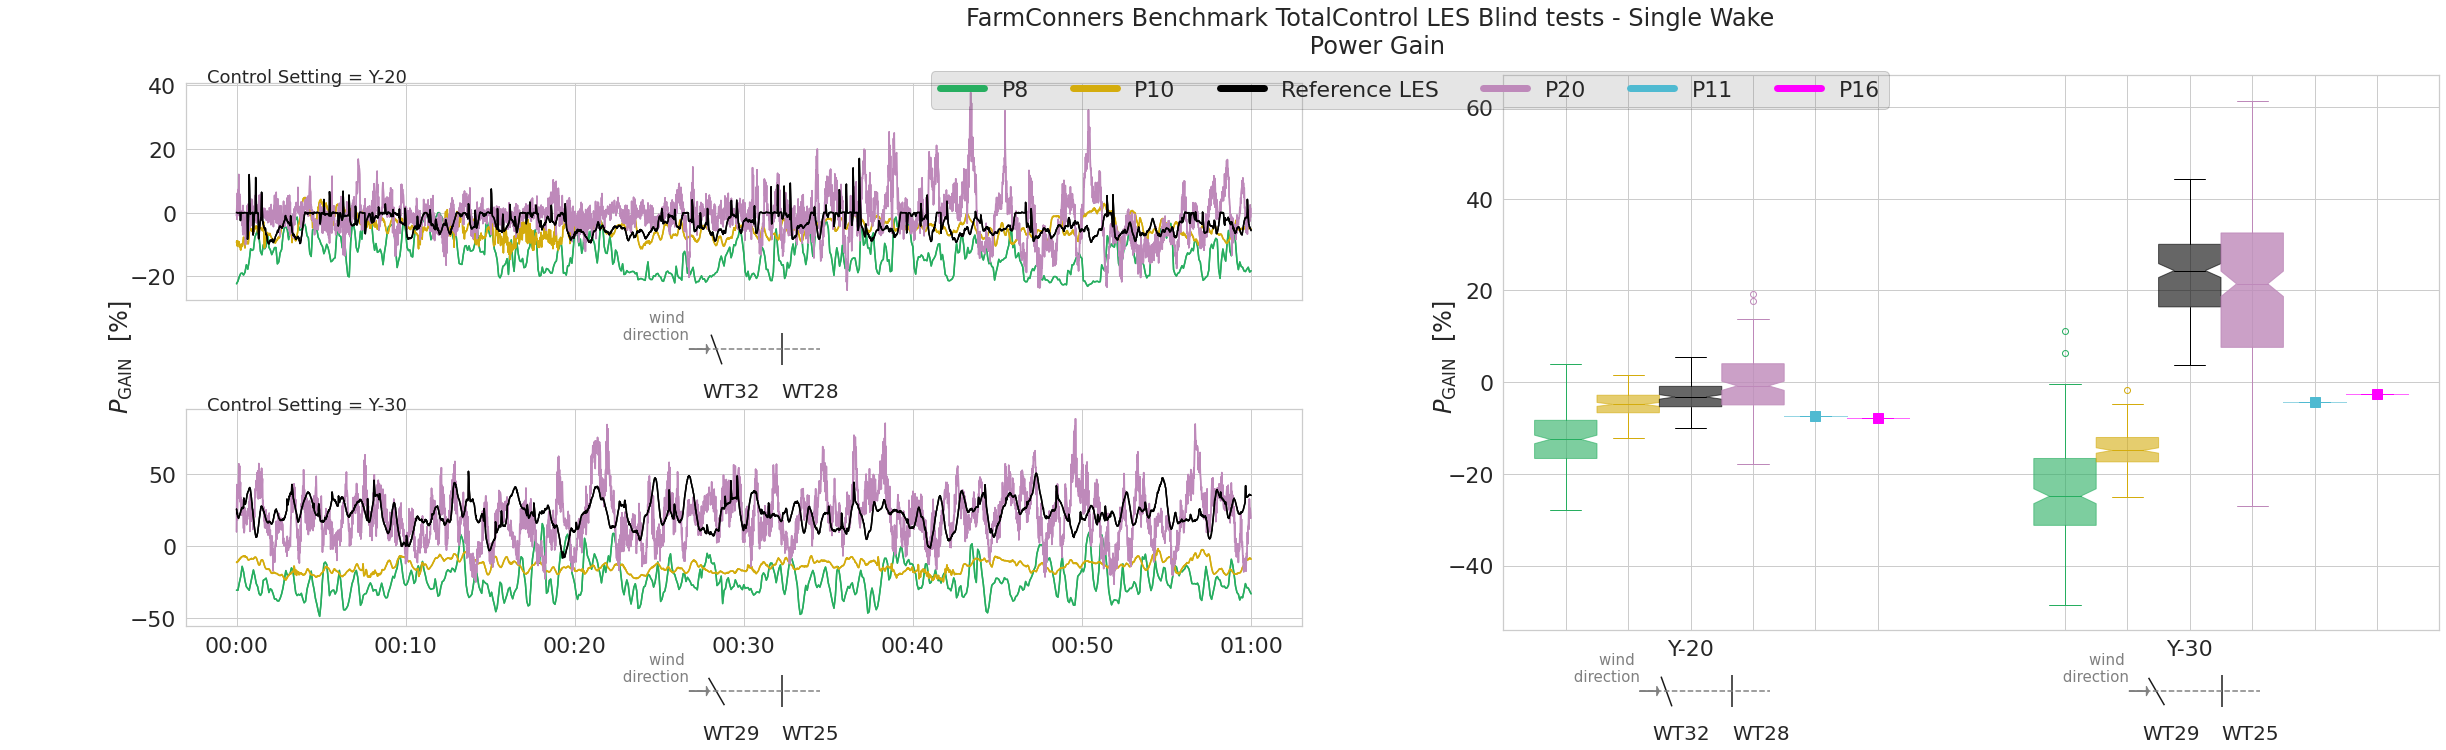

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import FancyArrow
from matplotlib.lines import Line2D

sns.set(style='whitegrid',
        font_scale=2)
#  P8, P10, validation, P16, P11, P16, P20
colors = [ '#27ae60', '#D4AC0D', '#000000', '#BE89BA', '#4fbad1', '#FF00FF']
pxs = ['P8','P10', 'validation', 'P20', 'P11', 'P16'] # participants for that Dataset  
sns.set_palette(sns.color_palette(colors))

turb = ['29', '25', '32', '28']

# fig,(ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
fig = plt.figure(figsize=(40, 10))
subfigs = fig.subfigures(1, 2)
ax0 = subfigs[0].subplots(2, 1, sharex=True)
subfigs[0].subplots_adjust(hspace=.5)
ax1 = subfigs[1].subplots()

x = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='s').time

box = 0
y = 0
for cx, px in enumerate(pxs): 
# -- time series plot -- #
    colr = colors[cx]
    if px == 'P10': # P10 submitted Delta_P directly
        y2 = P10_Delta['Delta_P_29_25']
        y1 = P10_Delta['Delta_P_32_28']
        
    else:
        channel = 'Power[kW]'              
        locals()[px+'_Delta'] = ((locals()[px+'_steering_turb_'+turb[0]][channel] + locals()[px+'_steering_turb_'+turb[1]][channel])/ 
                                  (locals()[px+'_normal_turb_'+turb[0]][channel] + locals()[px+'_normal_turb_'+turb[1]][channel]))
        y2 = locals()[px+'_Delta']
        
        locals()[px+'_Delta'] = ((locals()[px+'_steering_turb_'+turb[2]][channel] + locals()[px+'_steering_turb_'+turb[3]][channel])/ 
                                  (locals()[px+'_normal_turb_'+turb[2]][channel] + locals()[px+'_steering_turb_'+turb[3]][channel]))
        y1 = locals()[px+'_Delta']   
        
        
# -- box plot for the power gain --#  
    box = box+0.5
    for scen in range(0,2):
        al = 0.6
        if px == 'P20': al = 0.8
        y_pg = np.mean(locals()['y'+str(scen+1)]-1)*100

        std_pg = np.std(locals()['y'+str(scen+1)]-1)*100

        y_dist = np.zeros(shape=(1,200))
        c = colr
        y_dist = np.random.normal(y_pg, std_pg, 200)
        ax1.boxplot(y_dist,
                      positions=[scen*4-0.5+box],
                      notch=True,
                      vert=True,
                      patch_artist=True,
                      widths = 0.5,
                      boxprops=dict(facecolor=c, color=c, alpha = al),
                      capprops=dict(color=c),
                      whiskerprops=dict(color=c),
                      flierprops=dict(color=c, markeredgecolor=c),
                      medianprops=dict(color=c))
        if px == 'P11' or px =='P16':  # P11 & P16 are steady-state
            ax1.plot(scen*4-0.5+box, y_pg, color=c,  marker='s', markersize=10, linestyle='')
        else:
            y = pd.concat([(y1-1)*100,(y2-1)*100], axis=1)
            y.columns = ['Y-20', 'Y-30']
            if px == 'validation': z = 200
            else: z = 100
            y.plot(ax = ax0, subplots = True, color=colr, legend=False, zorder=z)
            ax0[1].set_xticks(x[::600])

pxs_label = ['P8','P10', 'Reference LES', 'P20', 'P11', 'P16']           
            
### --- Layout snippet for the left upper figure
newax = subfigs[0].add_axes([0.47, 0.46, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Layout snippet for the left lower figure
newax = subfigs[0].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=50)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #1
newax = subfigs[1].add_axes([0.13, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #2
newax = subfigs[1].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Legend
ax1.set_zorder(100)
line = Line2D([0,1],[0,1],linestyle='-')
ax1.legend(np.repeat(line, len(pxs_label)), pxs_label, 
           loc='lower center', bbox_to_anchor=(-0.1, 0.92), ncol = len(pxs), 
           facecolor='gray', edgecolor='k', framealpha=0.2)
leg = ax1.get_legend()
for i, px in enumerate(pxs_label):
    leg.legendHandles[i].set_color(colors[i])
    leg.get_lines()[i].set_linewidth(7)
# ax1.set_xticks([0.5, 4.5])
ax1.get_xaxis().set_ticklabels(['','', '', '', 'Y-20', 'Y-30','','','','','',''])
ax0[1].xaxis.label.set_visible(False)
ax1.set_position([0.04,0.12, 0.65, 0.77])

newax = subfigs[1].add_axes([-0.4, 0.85, 0.1, 0.1], anchor='S', zorder=120)
newax.text(3.5, 1,'FarmConners Benchmark TotalControl LES Blind tests - Single Wake \n Power Gain',
           ha = 'center', va='center')
newax.text(-4.6, 0.3, 'Control Setting = Y-20', ha='left', fontsize=18)
newax.text(-4.6, -4.25, 'Control Setting = Y-30', ha='left', fontsize=18)
newax.text(-5.2, -3.5, '$ P_{\mathrm{GAIN}}$  [%]', 
         ha = 'center', va='center', rotation='vertical')
newax.text(4, -3.5, '$ P_{\mathrm{GAIN}}$  [%]', 
         ha = 'center', va='center', rotation='vertical')
plt.axis('off')

fig.savefig('Figures/PowerGain_SW.png', bbox_inches='tight')
plt.show()

## Power differences upstream

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import FancyArrow
from matplotlib.lines import Line2D

sns.set(style='whitegrid',
        font_scale=2)
#  P8, P10, validation, P16, P11, P16, P20
colors = [ '#27ae60', '#000000', '#BE89BA', '#4fbad1', '#FF00FF']
pxs = ['P8', 'validation', 'P20', 'P11', 'P16'] # participants for that Dataset  
sns.set_palette(sns.color_palette(colors))

turb = ['29', '25', '32', '28']

# fig,(ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
fig = plt.figure(figsize=(40, 10))
subfigs = fig.subfigures(1, 2)
ax0 = subfigs[0].subplots(2, 1, sharex=True)
subfigs[0].subplots_adjust(hspace=.5)
ax1 = subfigs[1].subplots()

x = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='s').time

box = 0
y = 0
for cx, px in enumerate(pxs): 
# -- time series plot -- #
    colr = colors[cx]

    channel = 'Power[kW]'              
    locals()[px+'_Delta'] = locals()[px+'_steering_turb_'+turb[0]][channel] - locals()[px+'_normal_turb_'+turb[0]][channel] 
    y2 = locals()[px+'_Delta'] / 10**3

    locals()[px+'_Delta'] = locals()[px+'_steering_turb_'+turb[2]][channel] - locals()[px+'_normal_turb_'+turb[2]][channel]
    y1 = locals()[px+'_Delta'] / 10**3  
        
        
# -- box plot for the power gain --#  
    box = box+0.5
    for scen in range(1,3):
        al = 0.6
        if px == 'P20': al = 0.8
        y_pg = np.mean(locals()['y'+str(scen)])

        std_pg = np.std(locals()['y'+str(scen)])

        y_dist = np.zeros(shape=(1,200))
        c = colr
        y_dist = np.random.normal(y_pg, std_pg, 200)
        ax1.boxplot(y_dist,
                      positions=[scen*4-0.5+box],
                      notch=True,
                      vert=True,
                      patch_artist=True,
                      widths = 0.5,
                      boxprops=dict(facecolor=c, color=c, alpha = al),
                      capprops=dict(color=c),
                      whiskerprops=dict(color=c),
                      flierprops=dict(color=c, markeredgecolor=c),
                      medianprops=dict(color=c))
        if px == 'P11' or px =='P16':  # P11 & P16 are steady-state
            ax1.plot(scen*4-0.5+box, y_pg, color=c,  marker='s', markersize=10, linestyle='')
        else:
            y = pd.concat([y1, y2], axis=1)
            y.columns = ['Y-20', 'Y-30']
            if px == 'validation': z = 200
            else: z = 100
            y.plot(ax = ax0, subplots = True, color=colr, legend=False, zorder=z)
            ax0[1].set_xticks(x[::600])

            
pxs_label = ['P8', 'Reference LES', 'P20', 'P11', 'P16']

### --- Layout snippet for the left upper figure
newax = subfigs[0].add_axes([0.47, 0.46, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
# newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
# plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Layout snippet for the left lower figure
newax = subfigs[0].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=50)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
# newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
# plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #1
newax = subfigs[1].add_axes([0.1, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
# newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
# plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #2
newax = subfigs[1].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
# newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
# plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Legend
ax1.set_zorder(100)
line = Line2D([0,1],[0,1],linestyle='-')
ax1.legend(np.repeat(line, len(pxs_label)), pxs_label, 
           loc='lower center', bbox_to_anchor=(-0.1, 0.9), ncol = len(pxs), 
           facecolor='gray', edgecolor='k', framealpha=0.2)
leg = ax1.get_legend()
for i, px in enumerate(pxs_label):
    leg.legendHandles[i].set_color(colors[i])
    leg.get_lines()[i].set_linewidth(7)
# ax1.set_xticks([0.5, 4.5])
ax1.get_xaxis().set_ticklabels(['', '', 'Y-20', 'Y-30','','','','','',''])
ax0[1].xaxis.label.set_visible(False)
ax1.set_position([0.04,0.12, 0.65, 0.77])

newax = subfigs[1].add_axes([-0.4, 0.85, 0.1, 0.1], anchor='S', zorder=120)
newax.text(3.5, 1,'FarmConners Benchmark TotalControl LES Blind tests - Single Wake \n Power Difference Upstream',
           ha = 'center', va='center')
newax.text(-4.6, 0.3, 'Control Setting = Y-20', ha='left', fontsize=18)
newax.text(-4.6, -4.25, 'Control Setting = Y-30', ha='left', fontsize=18)
newax.text(-5.2, -3.5, '$ \Delta P$  [MW]', 
         ha = 'center', va='center', rotation='vertical')
newax.text(4, -3.5, '$ \Delta P$  [MW]',
         ha = 'center', va='center', rotation='vertical')
plt.axis('off')

fig.savefig('Figures/PowerDiff_Upstream.png', bbox_inches='tight')
plt.show()

## Power difference downstream

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import FancyArrow
from matplotlib.lines import Line2D

sns.set(style='whitegrid',
        font_scale=2)
#  P8, P10, validation, P16, P11, P16, P20
colors = [ '#27ae60', '#000000', '#BE89BA', '#4fbad1', '#FF00FF']
pxs = ['P8', 'validation', 'P20', 'P11', 'P16'] # participants for that Dataset  
sns.set_palette(sns.color_palette(colors))

turb = ['29', '25', '32', '28']

# fig,(ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
fig = plt.figure(figsize=(40, 10))
subfigs = fig.subfigures(1, 2)
ax0 = subfigs[0].subplots(2, 1, sharex=True)
subfigs[0].subplots_adjust(hspace=.5)
ax1 = subfigs[1].subplots()

x = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='s').time

box = 0
y = 0
for cx, px in enumerate(pxs): 
# -- time series plot -- #
    colr = colors[cx]

    channel = 'Power[kW]'              
    locals()[px+'_Delta'] = locals()[px+'_steering_turb_'+turb[1]][channel] - locals()[px+'_normal_turb_'+turb[1]][channel] 
    y2 = locals()[px+'_Delta'] / 10**3

    locals()[px+'_Delta'] = locals()[px+'_steering_turb_'+turb[3]][channel] - locals()[px+'_normal_turb_'+turb[3]][channel]
    y1 = locals()[px+'_Delta'] / 10**3  
        
        
# -- box plot for the power gain --#  
    box = box+0.5
    for scen in range(1,3):
        al = 0.6
        if px == 'P20': al = 0.8
        y_pg = np.mean(locals()['y'+str(scen)])

        std_pg = np.std(locals()['y'+str(scen)])

        y_dist = np.zeros(shape=(1,200))
        c = colr
        y_dist = np.random.normal(y_pg, std_pg, 200)
        ax1.boxplot(y_dist,
                      positions=[scen*4-0.5+box],
                      notch=True,
                      vert=True,
                      patch_artist=True,
                      widths = 0.5,
                      boxprops=dict(facecolor=c, color=c, alpha = al),
                      capprops=dict(color=c),
                      whiskerprops=dict(color=c),
                      flierprops=dict(color=c, markeredgecolor=c),
                      medianprops=dict(color=c))
        if px == 'P11' or px =='P16':  # P11 & P16 are steady-state
            ax1.plot(scen*4-0.5+box, y_pg, color=c,  marker='s', markersize=10, linestyle='')
        else:
            y = pd.concat([y1, y2], axis=1)
            y.columns = ['Y-20', 'Y-30']
            if px == 'validation': z = 200
            else: z = 100
            y.plot(ax = ax0, subplots = True, color=colr, legend=False, zorder=z)
            ax0[1].set_xticks(x[::600])

pxs_label = ['P8', 'Reference LES', 'P20', 'P11', 'P16']
            
### --- Layout snippet for the left upper figure
newax = subfigs[0].add_axes([0.47, 0.46, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
# plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Layout snippet for the left lower figure
newax = subfigs[0].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=50)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
# plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #1
newax = subfigs[1].add_axes([0.1, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
# plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #2
newax = subfigs[1].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
# plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Legend
ax1.set_zorder(100)
line = Line2D([0,1],[0,1],linestyle='-')
ax1.legend(np.repeat(line, len(pxs_label)), pxs_label, 
           loc='lower center', bbox_to_anchor=(-0.1, 0.9), ncol = len(pxs), 
           facecolor='gray', edgecolor='k', framealpha=0.2)
leg = ax1.get_legend()
for i, px in enumerate(pxs_label):
    leg.legendHandles[i].set_color(colors[i])
    leg.get_lines()[i].set_linewidth(7)
# ax1.set_xticks([0.5, 4.5])
ax1.get_xaxis().set_ticklabels(['', '', 'Y-20', 'Y-30','','','','','',''])
ax0[1].xaxis.label.set_visible(False)
ax1.set_position([0.04,0.12, 0.65, 0.77])

newax = subfigs[1].add_axes([-0.4, 0.85, 0.1, 0.1], anchor='S', zorder=120)
newax.text(3.5, 1,'FarmConners Benchmark TotalControl LES Blind tests - Single Wake \n Power Difference Downstream',
           ha = 'center', va='center')
newax.text(-4.6, 0.3, 'Control Setting = Y-20', ha='left', fontsize=18)
newax.text(-4.6, -4.25, 'Control Setting = Y-30', ha='left', fontsize=18)
newax.text(-5.2, -3.5, '$ \Delta P$  [MW]', 
         ha = 'center', va='center', rotation='vertical')
newax.text(4, -3.5, '$ \Delta P$  [MW]',
         ha = 'center', va='center', rotation='vertical')
plt.axis('off')

fig.savefig('Figures/PowerDiff_Downstream.png', bbox_inches='tight')
plt.show()

## Wake loss reduction plot
Turbine pair : 29 - 25 with -30yaw

Turbine pair : 32 - 28 with -20yaw


 $	\Delta u = \frac{{\sum_{j=1}^{n-1}(U_{up}-U_{1+j}})_{Op.=Normal}-{\sum_{j=1}^{n-1}(U_{up}-U_{1+j})}_{Op.=WFC}}{U_{up}}  $


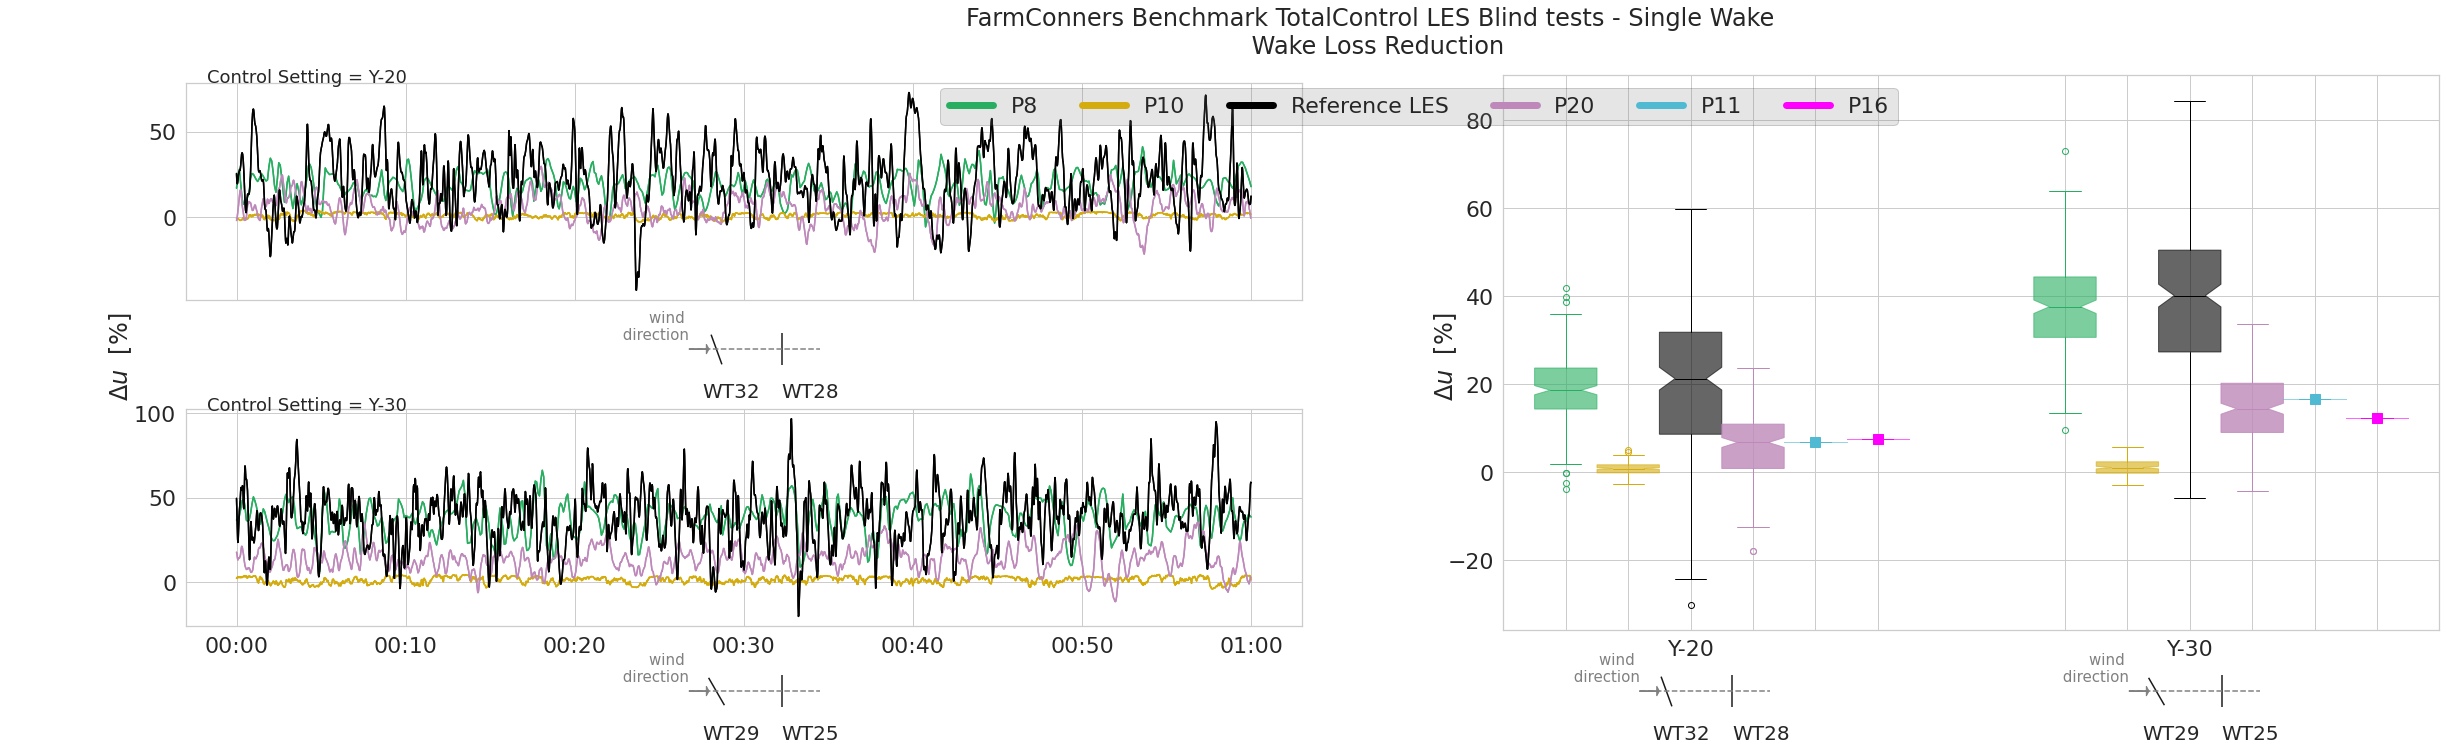

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import FancyArrow
from matplotlib.lines import Line2D

sns.set(style='whitegrid',
        font_scale=2)
#  P8, P10, validation, P16, P11, P16, P20
colors = [ '#27ae60', '#D4AC0D', '#000000', '#BE89BA', '#4fbad1', '#FF00FF']
pxs = ['P8','P10', 'validation', 'P20', 'P11', 'P16'] # participants for that Dataset   
sns.set_palette(sns.color_palette(colors))

turb = ['29', '25', '32', '28']

# fig,(ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(40,10))
fig = plt.figure(figsize=(40, 10))
subfigs = fig.subfigures(1, 2)
ax0 = subfigs[0].subplots(2, 1, sharex=True)
subfigs[0].subplots_adjust(hspace=.5)
ax1 = subfigs[1].subplots()

x = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 01:00:00', freq='s').time

box = 0
y = 0
for cx, px in enumerate(pxs): # per participant
# -- time series plot -- #
    colr = colors[cx]
    if px == 'P10': # P10 submitted Delta_P directly
        y2 = P10_Delta['Delta_u_29_25']
        y1 = P10_Delta['Delta_u_32_28']
        
    else: 
        channel = 'wsp'
        if px == 'validation': channel = 'Vhub[m/s]'    
        
        y2 = (((locals()[px+'_normal_turb_'+turb[0]][channel] - locals()[px+'_normal_turb_'+turb[1]][channel]) - 
              (locals()[px+'_steering_turb_'+turb[0]][channel] - locals()[px+'_steering_turb_'+turb[1]][channel]))/
             locals()[px+'_normal_turb_'+turb[0]][channel])
        y1 = (((locals()[px+'_normal_turb_'+turb[2]][channel] - locals()[px+'_normal_turb_'+turb[3]][channel]) - 
              (locals()[px+'_steering_turb_'+turb[2]][channel] - locals()[px+'_steering_turb_'+turb[3]][channel]))/
             locals()[px+'_normal_turb_'+turb[2]][channel])
        
        
# -- box plot for the wake loss reduction --#  
    box = box+0.5
    for scen in range(0,2):
        al = 0.6
        if px == 'P20': al = 0.8 # P20 colour might be a bit too light
        y_pg = np.mean(locals()['y'+str(scen+1)])*100

        std_pg = np.std(locals()['y'+str(scen+1)])*100

        y_dist = np.zeros(shape=(1,200))
        c = colr
        y_dist = np.random.normal(y_pg, std_pg, 200)
        ax1.boxplot(y_dist,
                      positions=[scen*4-0.5+box],
                      notch=True,
                      vert=True,
                      patch_artist=True,
                      widths = 0.5,
                      boxprops=dict(facecolor=c, color=c, alpha = al),
                      capprops=dict(color=c),
                      whiskerprops=dict(color=c),
                      flierprops=dict(color=c, markeredgecolor=c),
                      medianprops=dict(color=c))
        if px == 'P11' or px == 'P16':  # P11 & P16 are steady-state
            ax1.plot(scen*4-0.5+box, y_pg, color=c,  marker='s', markersize=10, linestyle='')
        else:
            y = pd.concat([(y1)*100,(y2)*100], axis=1)
            y.columns = ['Y-20', 'Y-30']   
            if px == 'validation': z = 200
            else: z = 100
            y.plot(ax = ax0, subplots = True, color=colr, legend=False, zorder=z)
            ax0[1].set_xticks(x[::600])

pxs_label = ['P8','P10', 'Reference LES', 'P20', 'P11', 'P16']
            
### --- Layout snippet for the left upper figure
newax = subfigs[0].add_axes([0.47, 0.46, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Layout snippet for the left lower figure
newax = subfigs[0].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=50)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #1
newax = subfigs[1].add_axes([0.13, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(20)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT32', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT28', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)


### --- Layout snippet per boxplot #2
newax = subfigs[1].add_axes([0.47, -0.015, 0.1, 0.1], anchor='S', zorder=105)
newax = plt.plot(range(0,100), np.zeros(shape=(100,)), '--', color='gray')
ar = FancyArrow(0, 0, 15, 0, width=0.001,
         head_width=0.015, head_length=2, length_includes_head=True, fc='gray', ec='gray') 
m = MarkerStyle("|")
m._transform.rotate_deg(30)
newax = plt.scatter(20,0, marker = m, s=1000, color='k')
plt.text(10, -0.05, 'WT29', ha = 'left', va='top', fontsize=20)
newax = plt.scatter(70,0, marker = "|", s=1000, color='k')
plt.text(70, -0.05, 'WT25', ha = 'left', va='top', fontsize=20)
plt.text(-0.01, 0.01, 'wind \n direction', color = 'gray', fontsize=15, ha = 'right', va='bottom')
plt.axis('off')
plt.gca().add_patch(ar)

### --- Legend
ax1.set_zorder(100)
line = Line2D([0,1],[0,1],linestyle='-')
ax1.legend(np.repeat(line, len(pxs_label)), pxs_label, 
           loc='lower center', bbox_to_anchor=(-0.09, 0.89), ncol = len(pxs), 
           facecolor='gray', edgecolor='k', framealpha=0.2)
leg = ax1.get_legend()
for i, px in enumerate(pxs_label):
    leg.legendHandles[i].set_color(colors[i])
    leg.get_lines()[i].set_linewidth(7)
# ax1.set_xticks([0.5, 4.5])
ax1.get_xaxis().set_ticklabels(['','','', '', 'Y-20', 'Y-30','','','','','',''])
ax0[1].xaxis.label.set_visible(False)
ax1.set_position([0.04,0.12, 0.65, 0.77])

newax = subfigs[1].add_axes([-0.4, 0.85, 0.1, 0.1], anchor='S', zorder=120)
newax.text(3.5, 1,'FarmConners Benchmark TotalControl LES Blind tests - Single Wake \n Wake Loss Reduction',
           ha = 'center', va='center')
newax.text(-4.6, 0.3, 'Control Setting = Y-20', ha='left', fontsize=18)
newax.text(-4.6, -4.25, 'Control Setting = Y-30', ha='left', fontsize=18)
newax.text(-5.2, -3.5, '$ \Delta u$  [%]', 
         ha = 'center', va='center', rotation='vertical')
newax.text(4, -3.5, '$ \Delta u $  [%]', 
         ha = 'center', va='center', rotation='vertical')
plt.axis('off')

fig.savefig('Figures/WakeLossReduction_SW.png', bbox_inches='tight')
plt.show()